# Seleção de Características - F Score

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Carregandos Dados BreastCancer

In [41]:
from ucimlrepo import fetch_ucirepo

breast_cancer = fetch_ucirepo(id=17)
X = breast_cancer.data.features
y = breast_cancer.data.targets
print("Shape Features:", X.shape)
print("Shape Targets:", y.shape)
print("Classes:", y.value_counts())
print("Features:", X.columns.tolist())
feature_names = X.columns.tolist()

y = y.replace({'B': 1, 'M': -1}).to_numpy()
X = X.to_numpy()

Shape Features: (569, 30)
Shape Targets: (569, 1)
Classes: Diagnosis
B            357
M            212
Name: count, dtype: int64
Features: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


/tmp/ipykernel_7853/4257691768.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'B': 1, 'M': -1}).to_numpy()


F-score: [1.06872850e+00 1.45167285e+00 4.91714319e+00 2.81923785e+00
 1.07896391e+03 3.20105722e+02 2.37243549e+02 5.60807318e+02
 5.32764995e+02 1.96798498e+03 5.99195802e+01 2.41250961e+01
 6.58060886e+00 9.35916558e-01 4.75437114e+03 8.13352729e+02
 5.17905615e+02 2.51939051e+03 1.65671003e+03 5.68258799e+03
 1.24039570e+00 2.25322570e+00 4.66531627e+00 2.56989007e+00
 6.69434514e+02 1.05705811e+02 8.60321053e+01 3.41664298e+02
 2.38055873e+02 7.95869718e+02]


([<matplotlib.axis.XTick at 0x74c6ac4362a0>,
 [Text(0, 0, 'radius1'),
  Text(1, 0, 'texture1'),
  Text(2, 0, 'perimeter1'),
  Text(3, 0, 'area1'),
  Text(4, 0, 'smoothness1'),
  Text(5, 0, 'compactness1'),
  Text(6, 0, 'concavity1'),
  Text(7, 0, 'concave_points1'),
  Text(8, 0, 'symmetry1'),
  Text(9, 0, 'fractal_dimension1'),
  Text(10, 0, 'radius2'),
  Text(11, 0, 'texture2'),
  Text(12, 0, 'perimeter2'),
  Text(13, 0, 'area2'),
  Text(14, 0, 'smoothness2'),
  Text(15, 0, 'compactness2'),
  Text(16, 0, 'concavity2'),
  Text(17, 0, 'concave_points2'),
  Text(18, 0, 'symmetry2'),
  Text(19, 0, 'fractal_dimension2'),
  Text(20, 0, 'radius3'),
  Text(21, 0, 'texture3'),
  Text(22, 0, 'perimeter3'),
  Text(23, 0, 'area3'),
  Text(24, 0, 'smoothness3'),
  Text(25, 0, 'compactness3'),
  Text(26, 0, 'concavity3'),
  Text(27, 0, 'concave_points3'),
  Text(28, 0, 'symmetry3'),
  Text(29, 0, 'fractal_dimension3')])

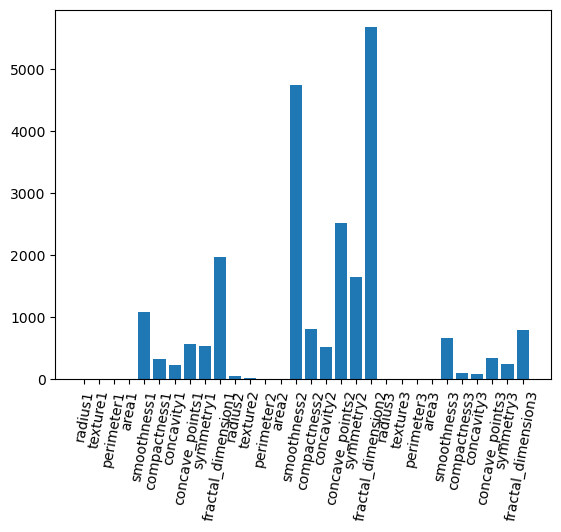

In [47]:
ic1 = np.where(y == 1)[0]
ic2 = np.where(y == -1)[0]

xc1 = X[ic1, :]
xc2 = X[ic2, :]

m1 = np.mean(xc1, axis=0)
m2 = np.mean(xc2, axis=0)
mall = np.mean(X[:, 0], axis=0)

f_score = (abs(m1 - mall) + abs(m2 - mall)) / (np.std(xc1, axis=0) + np.std(xc2, axis=0))
print("F-score:", f_score)
plt.bar(range(len(f_score)), f_score)
plt.xticks(np.arange(len(f_score)), feature_names, rotation=80)

In [ ]:
from utils import myPerceptron

new_X = X[:, f_score > 0.5]
perceptron = myPerceptron(new_X, y, max_epochs=1000, eta=0.01, tol = 0.1)
